# Video Game Sales Analysis Project
## Project Overview

In this project, you'll analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for the online store Ice, you'll use this information to help plan future advertising campaigns.

## Environment Setup and Required Libraries

In [147]:
# Import all required libraries
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [148]:
# Load the dataset
games = pd.read_csv('/datasets/games.csv')

In [149]:
# Display basic information about the dataset
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [150]:
print(games.sample(10))

                                                Name Platform  \
6343                                        NHL 2K11      Wii   
2961   The Lord of the Rings: The Return of the King       GC   
9424                                 TRON: Evolution      PSP   
9939                  CSI: Crime Scene Investigation       XB   
11944        Monster Rancher Battle Card: Episode II       PS   
11713                     Need For Speed: Undercover       PC   
9843                                    Burning Road       PS   
13742                                Breeding Stud 2       PS   
14728                                  In Cold Blood       PS   
8066             Vampire Savior: The Lord of Vampire      SAT   

       Year_of_Release      Genre  NA_sales  EU_sales  JP_sales  Other_sales  \
6343            2010.0     Sports      0.23      0.02      0.00         0.02   
2961            2003.0     Action      0.53      0.14      0.00         0.02   
9424            2010.0     Action      0.10 

In [151]:
# Check for duplicate entries
print(games[games.duplicated()])
# check to see what rows also has 'tbd'
(games == 'tbd').any()

Empty DataFrame
Columns: [Name, Platform, Year_of_Release, Genre, NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, User_Score, Rating]
Index: []


Name               False
Platform           False
Year_of_Release    False
Genre              False
NA_sales           False
EU_sales           False
JP_sales           False
Other_sales        False
Critic_Score       False
User_Score          True
Rating             False
dtype: bool

### Key Questions to Answer:
- What's the total number of records in our dataset?
- What data types are present in each column?
- Are there any obvious issues with the data?
- Do we see any immediate patterns or anomalies?

There is a total of 16715 records in the dataset.

The columns are either float64 or object type data. 

Missing values in several columns specially in critic_score and rating. 

year_of_release is a float64 data type and should be int and user_score is an object data type and should be float64

## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [152]:
# Convert column names to lowercase
games.columns = games.columns.str.lower()

In [153]:
# Verify the changes
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2 Data Type Conversion

In [154]:
# Check current data types
print('Data type of each column:')

games.dtypes

Data type of each column:


name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [155]:
# Make changes to data types if necessary
print('Updated data type of each column:')
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'coerce')
games.dtypes
# Describe the columns where the data types have been changed and why.
# Changes made
# year_of_release: float64 to Int64 
# why: year_of_released shoule be an integer and not a float value
# user_score: object to float64
# why: user_score should be a float value not object

Updated data type of each column:


name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [156]:
# Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
(games == 'tbd').any()

name               False
platform           False
year_of_release    False
genre              False
na_sales           False
eu_sales           False
jp_sales           False
other_sales        False
critic_score       False
user_score         False
rating             False
dtype: bool

### Handling 'TBD'
'tbd' in the user_score column changed into NaN after applying pd.to_numeric to the column and adding the errors ='coerce' arguement.

### 2.3 Handling Missing Values

In [157]:
# Examine missing values
print('Number of missing values in each column')
games.isnull().sum()

Number of missing values in each column


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [159]:
# Calculate percentage of missing values
print('Percentage of missing values for each column:')
percentage_missing = (games.isnull().sum())/(len(games))*100
print(percentage_missing)

Percentage of missing values for each column:
name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64


In [160]:
# Analyze patterns in missing values
# Create a correlation matrix of missing values
missing_corr = games.isnull().corr()
missing_corr = missing_corr.dropna(how='all', axis=0).dropna(how='all', axis=1)
print(missing_corr)


                     name  year_of_release     genre  critic_score  \
name             1.000000        -0.001399  1.000000      0.010654   
year_of_release -0.001399         1.000000 -0.001399     -0.021924   
genre            1.000000        -0.001399  1.000000      0.010654   
critic_score     0.010654        -0.021924  0.010654      1.000000   
user_score       0.009977        -0.004633  0.009977      0.798656   
rating           0.013265        -0.020232  0.013265      0.782945   

                 user_score    rating  
name               0.009977  0.013265  
year_of_release   -0.004633 -0.020232  
genre              0.009977  0.013265  
critic_score       0.798656  0.782945  
user_score         1.000000  0.731056  
rating             0.731056  1.000000  


In [161]:
# Compare missing patterns between 'name' and 'genre'
pd.crosstab(games['name'].isnull(), games['genre'].isnull(), margins=True)
# comparison was done because the correlation coeffecient was more than 0.5

genre,False,True,All
name,,,
False,16713,0,16713
True,0,2,2
All,16713,2,16715


In [162]:
# Compare missing patterns between 'critic_score' and 'user_score'
pd.crosstab(games['critic_score'].isnull(), games['user_score'].isnull(), margins=True)
# comparison was done because the correlation coeffecient was more than 0.5


user_score,False,True,All
critic_score,,,
False,7017,1120,8137
True,573,8005,8578
All,7590,9125,16715


In [163]:
# Compare missing patterns between 'critic_score' and 'user_score'
pd.crosstab(games['critic_score'].isnull(), games['rating'].isnull(), margins=True)
# comparison was done because the correlation coeffecient was more than 0.5

rating,False,True,All
critic_score,,,
False,8054,83,8137
True,1895,6683,8578
All,9949,6766,16715


In [164]:
# Compare missing patterns between 'critic_score' and 'user_score'
pd.crosstab(games['user_score'].isnull(), games['rating'].isnull(), margins=True)
# comparison was done because the correlation coeffecient was more than 0.5

rating,False,True,All
user_score,,,
False,7504,86,7590
True,2445,6680,9125
All,9949,6766,16715


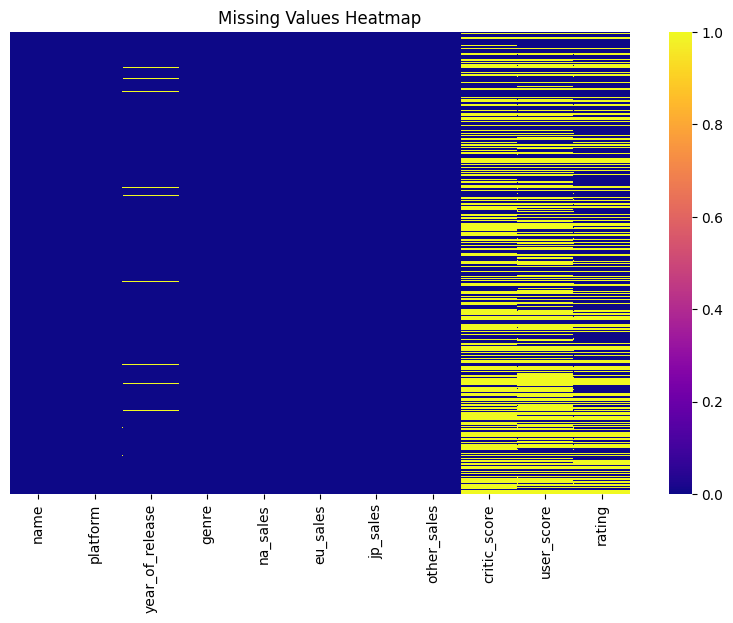

In [165]:

# Heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(games.isnull(), cbar=True, yticklabels=False,cmap='plasma')
plt.title('Missing Values Heatmap')
plt.show()


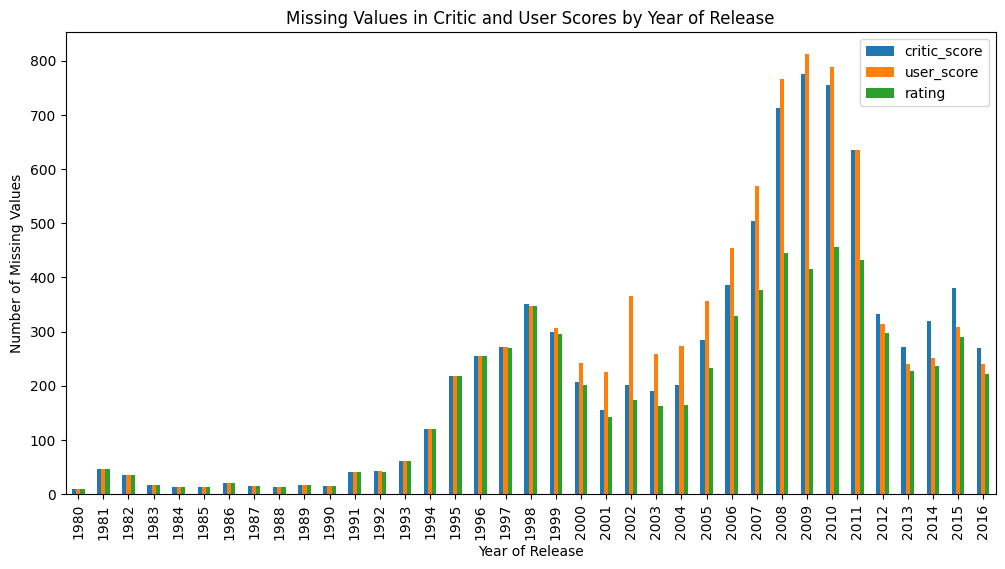

In [166]:

# Create a new DataFrame with relevant columns
analysis_df = games[['year_of_release', 'critic_score', 'user_score','rating']]
# Count missing values grouped by year of release

missing_counts = analysis_df.groupby('year_of_release').agg({
    'critic_score': lambda x: x.isnull().sum(),
    'user_score': lambda x: x.isnull().sum(),
    'rating': lambda x:x.isnull().sum()
})
# Plot missing values for critic and user scores by year
missing_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Missing Values in Critic and User Scores by Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Number of Missing Values')
plt.show()


In [167]:
# Handle missing values based on analysis
# Your code here to handle missing values according to your strategy
games['name'] = games['name'].fillna('N/A')
games['genre'] = games['genre'].fillna('N/A')
games['rating'] = games['rating'].fillna('N/A')
#print(games.sample(10))

In [168]:
# Why do you think the values are missing? Give possible reasons.
# Explain why you filled in the missing values as you did or why you decided to leave them blank.

### Potential reasons for missing values:
Since 1980 more games and platforms are being produced through all regions. This leads to a popularity disperarity where some games are potentially not played enough to garner reviews from critics or users. 
It could also be simply incomplete data since it was collected through open sources. 
### Explanation of how and values were filled:
Only the columns that are object type were filled in ('genre','name','rating'). They were changed to N/A for easier comparision later. 
Columns with float64 or Int64 data types were left as is to not affect future calculations drastically. There are too many missing values from the critic_score and the user_score to justify what they should be filled with.  51% and 54% missing respectively. 

### 2.4 Calculate Total Sales

In [169]:
# Calculate total sales across all regions and put them in a different column
games['total_sales'] = games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
print(games.sample(2))

                                          name platform  year_of_release  \
10649                           Deca Sports DS       DS             2009   
8995   Tennis no Oji-Sama: Aim at The Victory!      GBA             2002   

        genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
10649  Sports      0.07      0.02      0.00         0.01          57.0   
8995   Sports      0.00      0.00      0.14         0.00           NaN   

       user_score rating  total_sales  
10649         NaN      E         0.10  
8995          NaN    N/A         0.14  


# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [170]:
# Create a DataFrame with game releases by year
number_of_releases = games.groupby('year_of_release')['name'].count().reset_index(name='number_of_releases')
number_of_releases

,year_of_release,number_of_releases
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


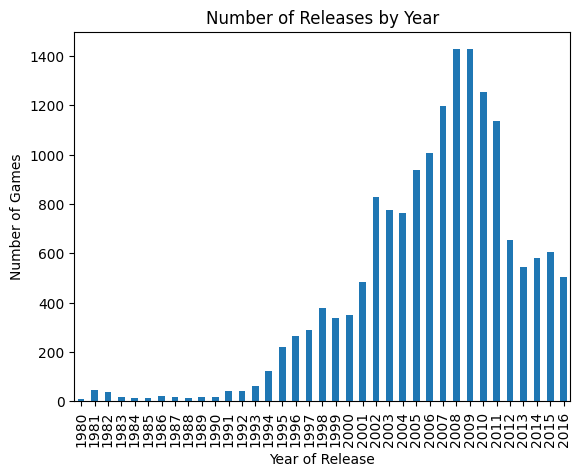

In [171]:
# Visualize the distribution of games across years
number_of_releases.plot(
    x = 'year_of_release',
    y = 'number_of_releases',
    kind = 'bar',
    ylabel = 'Number of Games',
    xlabel = 'Year of Release',
    title = 'Number of Releases by Year',
    legend = False
)
plt.show()

In [172]:
# Display summary statistics for each year
summary_by_year = games.groupby('year_of_release')['na_sales','eu_sales','jp_sales','other_sales','total_sales'].describe()
summary_by_year

na_sales                                                   \
                   count      mean       std   min     25%    50%     75%   
year_of_release                                                             
1980                 9.0  1.176667  1.282624  0.22  0.3200  0.720  1.0700   
1981                46.0  0.726087  0.730885  0.12  0.2925  0.435  0.8925   
1982                36.0  0.747778  1.172248  0.13  0.3150  0.500  0.7225   
1983                17.0  0.456471  0.278903  0.01  0.3100  0.430  0.5100   
1984                14.0  2.377143  7.089785  0.00  0.0450  0.345  0.7700   
1985                14.0  2.409286  7.689309  0.00  0.0000  0.285  0.6025   
1986                21.0  0.595238  0.881542  0.00  0.0000  0.320  0.7100   
1987                16.0  0.528750  0.653094  0.00  0.1350  0.370  0.4875   
1988                15.0  1.591333  2.630154  0.00  0.1000  0.590  1.3700   
1989                17.0  2.655882  5.893720  0.00  0.1400  0.660  0.9600   
1990                16.0  1.591250  3.087251  0.00  0.2300  0.675  1.7325   
1991                41.0  0.311220  0.643619  0.00  0.0000  0.000  0.4100   
1992                43.0  0.788140  1.359452  0.00  0.0000  0.020  1.1000   
1993                62.0  0.272581  0.841223  0.00  0.0000  0.000  0.0775   
1994               121.0  0.232727  0.611660  0.00  0.0000  0.000  0.0200   
1995               219.0  0.113379  0.347959  0.00  0.0000  0.000  0.0400   
1996               263.0  0.329886  1.007959  0.00  0.0000  0.040  0.1650   
1997               289.0  0.327855  0.711767  0.00  0.0000  0.070  0.2900   
1998               379.0  0.338681  0.646139  0.00  0.0100  0.080  0.3600   
1999               338.0  0.372959  0.788408  0.00  0.0200  0.130  0.3575   
2000               350.0  0.270000  0.457221  0.00  0.0200  0.100  0.2875   
2001               482.0  0.360954  0.734771  0.00  0.0325  0.115  0.3300   
2002               829.0  0.260784  0.561713  0.00  0.0300  0.090  0.2300   
2003               775.0  0.249819  0.402497  0.00  0.0400  0.110  0.2600   
2004               762.0  0.292008  0.611504  0.00  0.0400  0.110  0.3275   
2005               939.0  0.257881  0.590938  0.00  0.0400  0.100  0.2600   
2006              1006.0  0.260567  1.478435  0.00  0.0000  0.050  0.1900   
2007              1197.0  0.258889  0.608283  0.00  0.0000  0.090  0.2700   
2008              1427.0  0.244352  0.631926  0.00  0.0100  0.090  0.2500   
2009              1426.0  0.235309  0.760085  0.00  0.0000  0.090  0.2100   
2010              1255.0  0.239562  0.732948  0.00  0.0000  0.080  0.1900   
2011              1136.0  0.210202  0.580080  0.00  0.0000  0.060  0.1700   
2012               653.0  0.234701  0.626764  0.00  0.0000  0.050  0.2100   
2013               544.0  0.282445  0.777533  0.00  0.0000  0.045  0.2400   
2014               581.0  0.227659  0.515008  0.00  0.0000  0.050  0.2000   
2015               606.0  0.176337  0.487092  0.00  0.0000  0.020  0.1300   
2016               502.0  0.089502  0.258167  0.00  0.0000  0.010  0.0500   

                       eu_sales            ... other_sales        total_sales  \
                   max    count      mean  ...         75%    max       count   
year_of_release                            ...                                  
1980              4.00      9.0  0.074444  ...      0.0100   0.05         9.0   
1981              4.21     46.0  0.042609  ...      0.0100   0.05        46.0   
1982              7.28     36.0  0.045833  ...      0.0100   0.08        36.0   
1983              1.22     17.0  0.047059  ...      0.0100   0.02        17.0   
1984             26.93     14.0  0.150000  ...      0.0275   0.47        14.0   
1985             29.08     14.0  0.338571  ...      0.0200   0.77        14.0   
1986              3.74     21.0  0.135238  ...      0.0300   1.51        21.0   
1987              2.19     16.0  0.088125  ...      0.0100   0.08        16.0   
1988              9.54     15.0  0.439333  .

### Questions to Consider:
- Which years show significant numbers of game releases?
- Are there any notable trends or patterns in the number of releases?
- Is there enough recent data to make predictions for 2017?

### Years of Significant Game Releases
The years with the most game releases are 2007 and 2008. This was probably caused by the development of the xbox 360 in 2005 and of the wii and PS3 in 2006. 

### Notable Trends

- Despite a few years, there is a gradual increase in games released from 1993 to 2008
- There is also a gradual decrease with the exception of a few years from 2009 to 2016
- Game production was pretty stagnant from 1980 to 1992

### 2017 Predictions?
Yes, there is enough data to make predictions for 2017 but we cannot forget the large portion of missing data for critic and user score.

## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [173]:
# Calculate total sales by platform and year
platform_total_sales = games.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index(name = 'total_sales')
platform_total_sales

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
233,XB,2008,0.18
234,XOne,2013,18.96
235,XOne,2014,54.07
236,XOne,2015,60.14


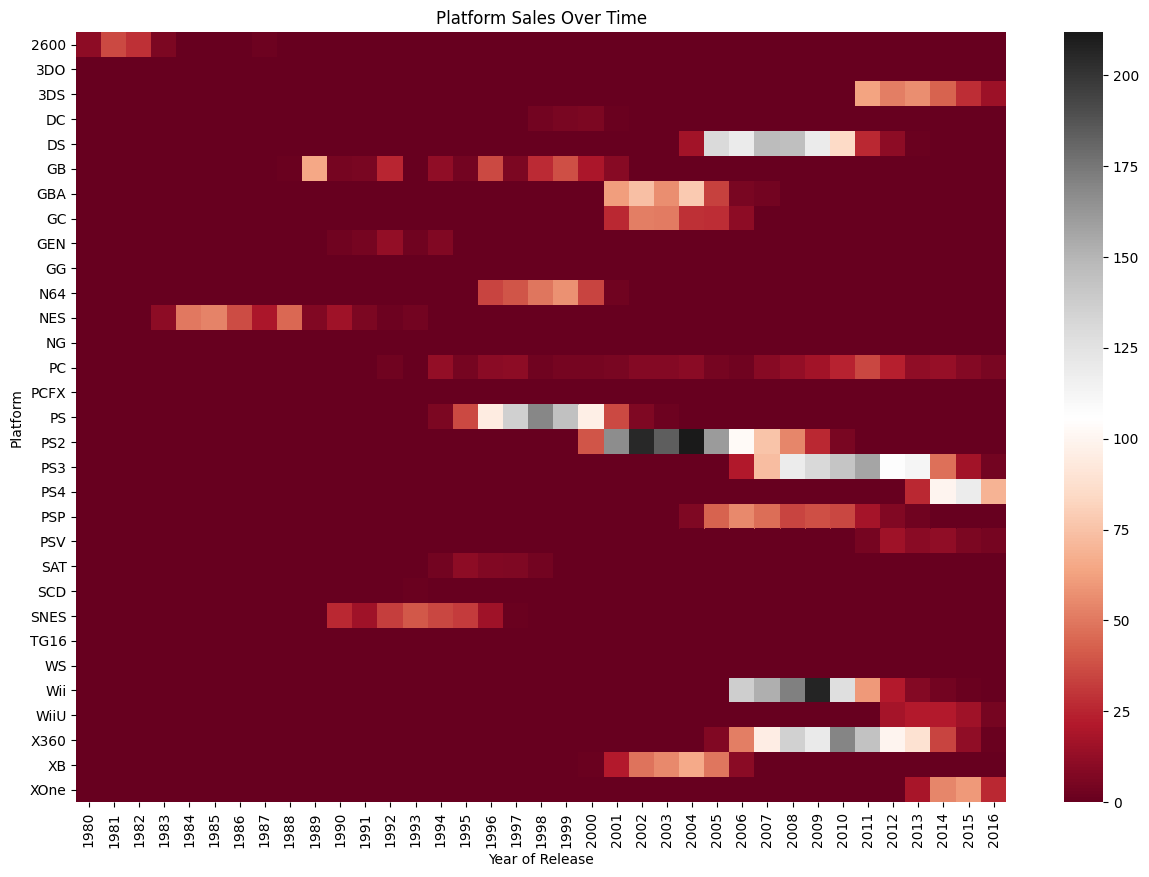

In [174]:
# Reshape the data for heatmap using pivot
platform_sales_matrix = platform_total_sales.pivot(
    index='platform', 
    columns='year_of_release', 
    values='total_sales'
)

# Fill missing values with 0 (platforms that didn't exist in certain years)
platform_sales_matrix = platform_sales_matrix.fillna(0)

# Now create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(platform_sales_matrix, cbar=True, cmap='RdGy')
plt.title('Platform Sales Over Time')
plt.xlabel('Year of Release')
plt.ylabel('Platform')
plt.show()

### Identify platforms with declining sales
- 3DS
- DS
- PC
- PS
- PS2
- PS3
- PSP
- Wii
- WiiU
- X360
- XB
- Xone

### Questions to Consider:
- Which platforms show consistent sales over time?
- Can you identify platforms that have disappeared from the market?
- What's the typical lifecycle of a gaming platform?

### Consistent Platfoms
While other platforms have had better performing years in terms of sales the platform that has shown the longest consistency according to the heat map is PC.  
### Disappeared platforms
- 2600
- 3DO
- DC
- GB
- GBA
- GC
- GEN
- GG
- N64
- NES
- NG
- PCFX
- PS
- SAT
- SCD
- SNES
- TG16
- WS
- XB

According to the heat map these platforms have little to no sales since 2011 which means they are phasing out of the market or have already disappeared.

### Lifecycle
The typical lifespan  of each platforms appears to be around 7-10 years. Most platform show an uptrend and downtrend that last for said time. 

## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

In [175]:
# Your code here to filter the dataset to relevant years
# Example:
# relevant_years = [XXXX, XXXX, XXXX] # Replace with your chosen years
# df_relevant = df[df['year_of_release'].isin(relevant_years)]
relevant_years = [2012, 2013, 2014, 2015, 2016]

relevant_games = games[games['year_of_release'].isin(relevant_years)]

relevant_games
# Justify your choice with data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,N/A,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,N/A,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,N/A,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,N/A,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,N/A,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,N/A,0.01


### Document Your Decision:
- What years did you select and why?
- How does this period reflect current market conditions?
- What factors influenced your decision?

### Years selected and reason:
I selected the years 2012, 2013, 2014, 2015, and 2016. The years were selected because the total number of games released took a huge drop after 2011. The world of video games is constanly changing with technology evolving rapidly so choosing a larger time frame would include the performance performance of games and platforms that are potentially no longer around.

The period chosen seems to be consistent in terms of numbers of games released per year so it shows good sign of being a good time frame to use to predict future years. 


## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

In [176]:

# Analyze platform sales trends

relevant_sales_by_platform = relevant_games.groupby(['platform','year_of_release'])['na_sales','eu_sales','jp_sales','other_sales','total_sales'].sum()
relevant_sales_by_platform


na_sales  eu_sales  jp_sales  other_sales  \
platform year_of_release                                              
3DS      2012                17.11     11.68     19.98         2.59   
         2013                15.56     14.84     23.57         2.60   
         2014                12.33      8.73     20.69         2.01   
         2015                 6.17      5.06     15.52         1.03   
         2016                 4.14      2.33      8.03         0.64   
DS       2012                 4.02      2.68      3.72         0.59   
         2013                 0.57      0.85      0.00         0.12   
PC       2012                 8.01     12.40      0.00         2.81   
         2013                 3.88      7.39      0.00         1.11   
         2014                 3.51      8.87      0.00         0.90   
         2015                 2.36      5.57      0.00         0.59   
         2016                 1.36      3.53      0.00         0.36   
PS3      2012                39.88     39.05     11.94        16.49   
         2013                41.45     42.27     12.13        17.40   
         2014                16.39     18.24      6.25         6.88   
         2015                 4.99      6.04      3.67         2.12   
         2016                 0.67      1.26      1.30         0.37   
PS4      2013                10.13     11.05      0.94         3.87   
         2014                34.75     46.50      2.97        15.78   
         2015                42.37     51.76      6.31        18.46   
         2016                21.49     31.78      5.74        10.24   
PSP      2012                 0.13      0.25      7.18         0.13   
         2013                 0.00      0.17      2.93         0.04   
         2014                 0.00      0.00      0.24         0.00   
         2015                 0.00      0.00      0.12         0.00   
PSV      2012                 5.94      5.26      2.45         2.54   
         2013                 2.52      2.57      4.05         1.45   
         2014                 1.98      2.45      6.13         1.34   
         2015                 0.39      0.69      4.85         0.32   
         2016                 0.15      0.39      3.56         0.15   
Wii      2012                10.89      5.99      3.34         1.49   
         2013                 4.48      3.34      0.05         0.72   
         2014                 1.59      1.86      0.00         0.30   
         2015                 0.43      0.62      0.00         0.09   
         2016                 0.06      0.11      0.00         0.01   
WiiU     2012                 8.89      5.28      2.13         1.26   
         2013                 9.85      6.70      3.57         1.53   
         2014                10.50      6.66      3.19         1.68   
         2015                 6.76      5.01      3.45         1.13   
         2016                 2.10      1.48      0.67         0.35   
X360     2012                58.39     32.00      1.06         8.29   
         2013                53.36     27.03      0.43         7.76   
         2014                20.25     11.28      0.08         3.13   
         2015                 7.36      3.50      0.00         1.10   
         2016                 0.69      0.71      0.00         0.12   
XOne     2013                11.85      5.34      0.02         1.75   
         2014                30.97     18.15      0.14         4.81   
         2015                36.03     18.47      0.17         5.47   
         2016                14.27      9.63      0.01         2.24   

                          total_sales  
platform year_of_release               
3DS      2012                   51.36  
         2013                   56.57  
         2014                   43.76  
         2015                   27.78  
         2016                   15.14  
DS       2012                   11.01  
         2013                    1.54  
PC       2012                   23.22  
    

In [177]:
# Sort platforms by total sales
relevant_total_sales = relevant_games.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index(name = "total_sales")
relevant_total_sales.sort_values(by='total_sales', ascending = False)

,platform,year_of_release,total_sales
19,PS4,2015,118.90
13,PS3,2013,113.25
12,PS3,2012,107.36
18,PS4,2014,100.00
40,X360,2012,99.74
41,X360,2013,88.58
20,PS4,2016,69.25
47,XOne,2015,60.14
1,3DS,2013,56.57
46,XOne,2014,54.07


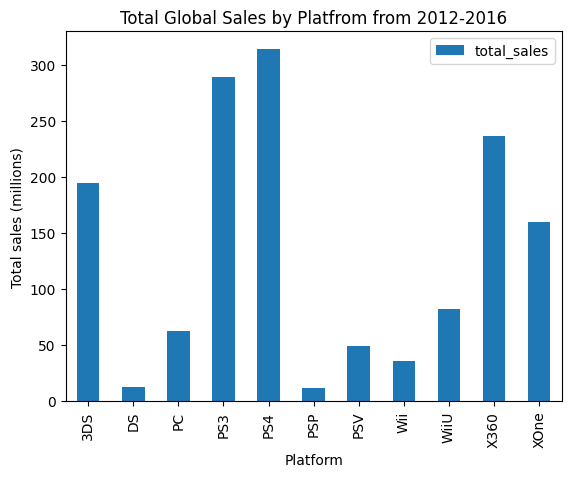

In [178]:
# Visualize top platforms
top_platforms_relevant_time = relevant_games.groupby(['platform'])['total_sales'].sum().reset_index(name = 'total_sales')
top_platforms_relevant_time.plot(
    x = 'platform',
    y = 'total_sales',
    kind = 'bar',
    xlabel = 'Platform',
    ylabel = 'Total sales (millions)',
    title = 'Total Global Sales by Platfrom from 2012-2016'
)
plt.show()



In [179]:


# Calculate year-over-year growth for each platform
relevant_platform_list = relevant_games['platform'].unique().tolist()
#print(relevant_platform_list)

# Your code here to calculate and visualize platform growth rates
relevant_total_sales['growth'] = relevant_total_sales.groupby('platform')['total_sales'].pct_change() * 100
relevant_total_sales


,platform,year_of_release,total_sales,growth
0,3DS,2012,51.36,NaN
1,3DS,2013,56.57,10.144081
2,3DS,2014,43.76,-22.644511
3,3DS,2015,27.78,-36.517367
4,3DS,2016,15.14,-45.500360
5,DS,2012,11.01,NaN
6,DS,2013,1.54,-86.012716
7,PC,2012,23.22,NaN
8,PC,2013,12.38,-46.683893
9,PC,2014,13.28,7.269790


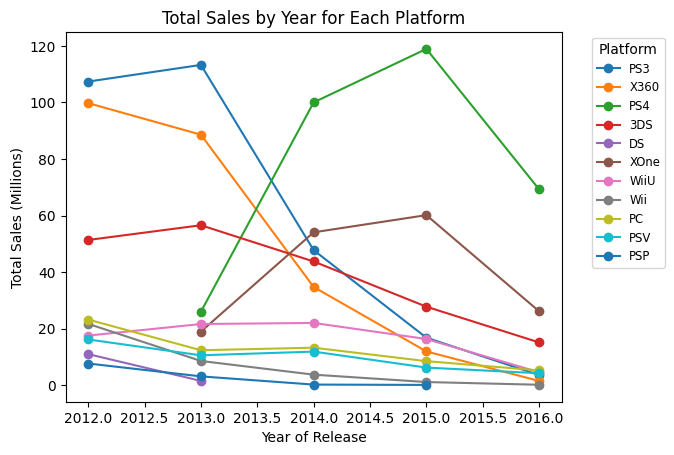

In [180]:
# Loop to graph each platform in one plot
for platforms in relevant_platform_list:
    subset = relevant_total_sales[relevant_total_sales['platform'] == platforms]
    plt.plot(
        subset['year_of_release'],
        subset['total_sales'],
        marker='o',
        label= platforms,
        
    
    )
plt.title('Total Sales by Year for Each Platform')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (Millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()



## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

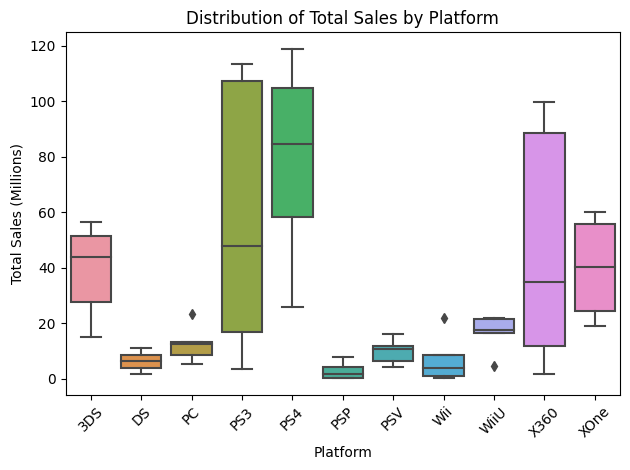

In [181]:
# Create box plot of sales by platform
sns.boxplot(x='platform', y='total_sales', data=relevant_total_sales)
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.title('Distribution of Total Sales by Platform')
plt.ylabel('Total Sales (Millions)')
plt.xlabel('Platform')
plt.tight_layout()
plt.show()

In [182]:
# Calculate detailed statistics for each platform
platform_describe = relevant_games.groupby('platform')['total_sales'].describe()
platform_describe

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,493.0,0.585781,1.462855,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [183]:
# Choose a popular platform based on your previous analysis
XOne_platform = relevant_games[relevant_games['platform'] == 'XOne']


In [184]:
# Create scatter plots for both critic and user scores

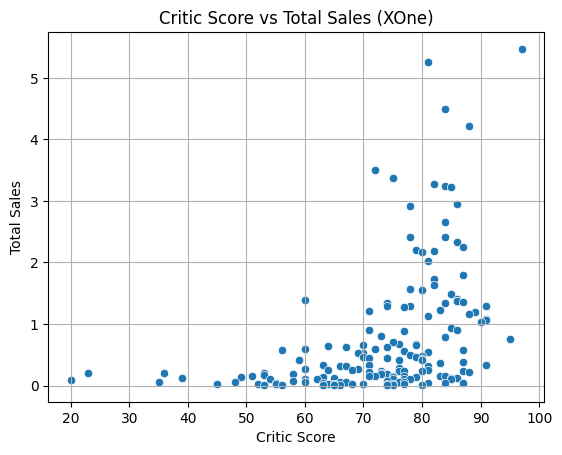

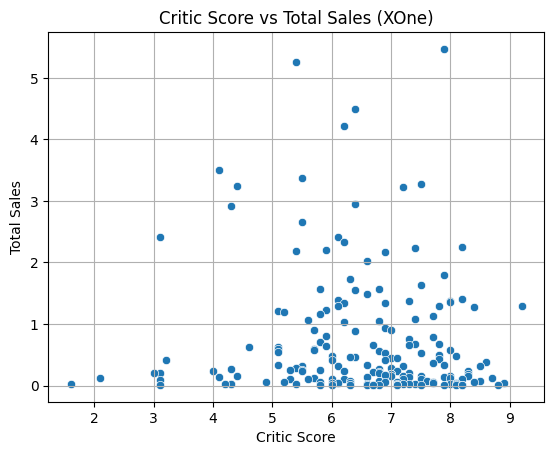

In [185]:
# Critic Scores scatter plot
plt.figure()
sns.scatterplot(data=XOne_platform, x='critic_score', y='total_sales')
plt.title('Critic Score vs Total Sales (XOne)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()
# User Scores scatter plot
plt.figure()
sns.scatterplot(data=XOne_platform, x='user_score', y='total_sales')
plt.title('Critic Score vs Total Sales (XOne)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


In [186]:
# Calculate correlations
xone_critic_corr = XOne_platform['critic_score'].corr(XOne_platform['total_sales'])
xone_user_corr = XOne_platform['user_score'].corr(XOne_platform['total_sales'])

print(f'The correlation coefficient between Xbox One total sales and critic scores is: {xone_critic_corr:.2f}')
print(f'The correlation coefficient between Xbox One total sales and user scores is: {xone_user_corr:.2f}')

The correlation coefficient between Xbox One total sales and critic scores is: 0.42
The correlation coefficient between Xbox One total sales and user scores is: -0.07


## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [187]:
# Find games released on multiple platforms
# Group by 'name' and count the number of unique platforms for each game
platform_counts = relevant_games.groupby('name')['platform'].nunique()

# Filter games that appear on more than one platform
multi_platform_games = platform_counts[platform_counts > 1].index

# View the full records of those games
games_on_multiple_platforms = relevant_games[relevant_games['name'].isin(multi_platform_games)]
games_on_multiple_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,N/A,14.63
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,N/A,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,N/A,0.01


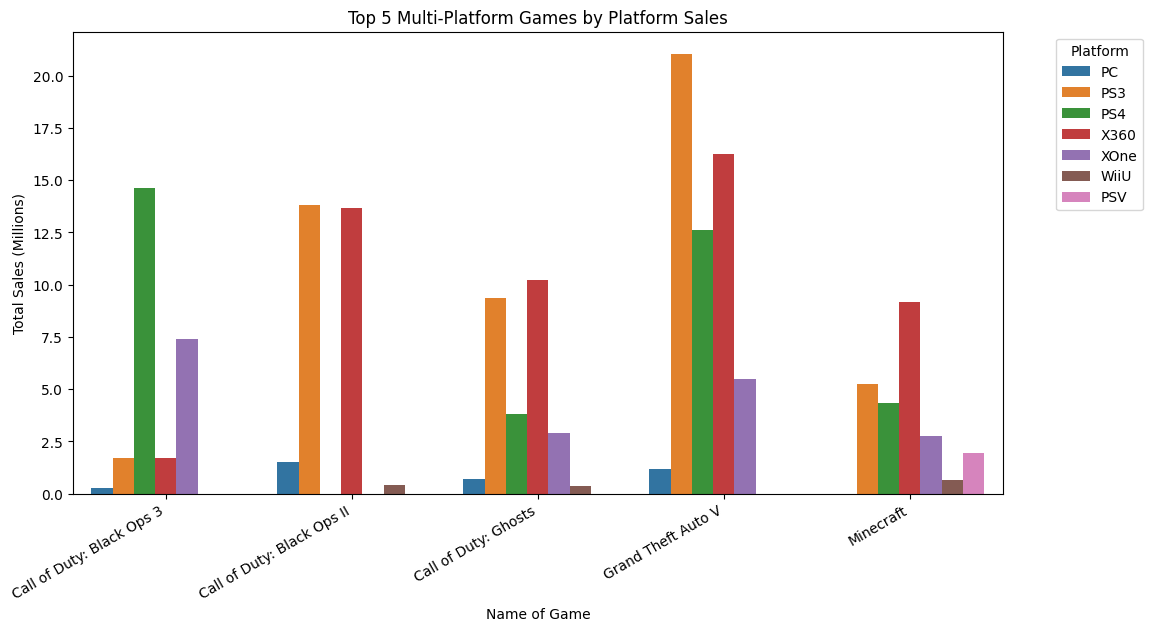

In [188]:
# Compare sales across platforms for these games
# Group to get total sales per game (across all platforms)

# Sorting games by total sale (ascending= False)
top_multi_platform_games = (relevant_games.groupby('name')['total_sales']
    .sum()
    .reset_index()
    .sort_values(by='total_sales', ascending=False)
)
# Only the top 5 games to avoid having too many games displayed 
top_5_names = top_multi_platform_games.head(5)['name'].tolist()

# filtering to only have data frame of top 5 games
top_5_platform_sales = relevant_games[relevant_games['name'].isin(top_5_names)]
# regroup top 5 games by name and platform

top_platform_sales = (top_5_platform_sales.groupby(['name', 'platform'])['total_sales']
    .sum()
    .reset_index()
)
# Your code here to analyze and visualize cross-platform performance
plt.figure(figsize=(12, 6))
sns.barplot(data=top_platform_sales, x='name', y='total_sales', hue='platform')
plt.title('Top 5 Multi-Platform Games by Platform Sales')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Total Sales (Millions)')
plt.xlabel('Name of Game')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [189]:
# Analyze genre performance

genre_summary = (
    relevant_games.groupby('genre')
    .agg(
        total_sales=('total_sales', 'sum'),
        avg_total_sales=('total_sales','mean'),
        avg_critic_score=('critic_score', 'mean'),
        avg_user_score=('user_score', 'mean'),
        game_count=('name', 'count')
    )
)
genre_summary

,total_sales,avg_total_sales,avg_critic_score,avg_user_score,game_count
genre,,,,,
Action,441.12,0.427856,71.378440,6.825048,1031
Adventure,29.43,0.097450,72.661017,7.466667,302
Fighting,44.49,0.408165,70.406250,6.895714,109
Misc,85.04,0.442917,72.807018,6.938806,192
Platform,61.00,0.717647,74.610169,6.806061,85
Puzzle,4.89,0.174643,75.444444,7.633333,28
Racing,53.50,0.465217,71.864198,6.151163,115
Role-Playing,192.80,0.521081,73.049689,7.258480,370
Shooter,304.73,1.296723,73.421965,6.435897,235


In [190]:
# Sort genres by total sales
genre_total_sales = (
    relevant_games.groupby('genre')['total_sales']
    .sum()
    .reset_index()
    .sort_values(by='total_sales', ascending=False)
)
genre_total_sales

,genre,total_sales
0,Action,441.12
8,Shooter,304.73
7,Role-Playing,192.80
10,Sports,181.07
3,Misc,85.04
4,Platform,61.00
6,Racing,53.50
2,Fighting,44.49
9,Simulation,35.12
1,Adventure,29.43


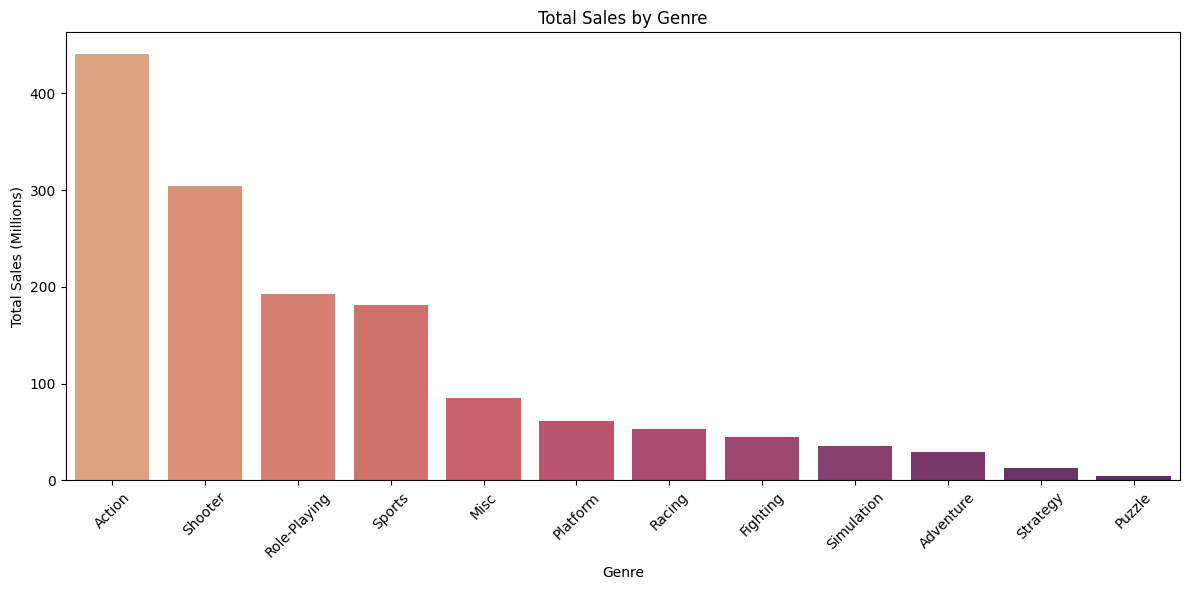

In [191]:
# Visualize genre distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_total_sales, x='genre', y='total_sales', palette='flare')
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [192]:
# Calculate market share for each genre
total_market_sales = genre_total_sales['total_sales'].sum()\
# Adding market share percent column
genre_total_sales['market_share_percent'] = (genre_total_sales['total_sales'] / total_market_sales * 100)
genre_total_sales

,genre,total_sales,market_share_percent
0,Action,441.12,30.495047
8,Shooter,304.73,21.066276
7,Role-Playing,192.80,13.328448
10,Sports,181.07,12.517542
3,Misc,85.04,5.878896
4,Platform,61.00,4.216988
6,Racing,53.50,3.698506
2,Fighting,44.49,3.075636
9,Simulation,35.12,2.427879
1,Adventure,29.43,2.034524


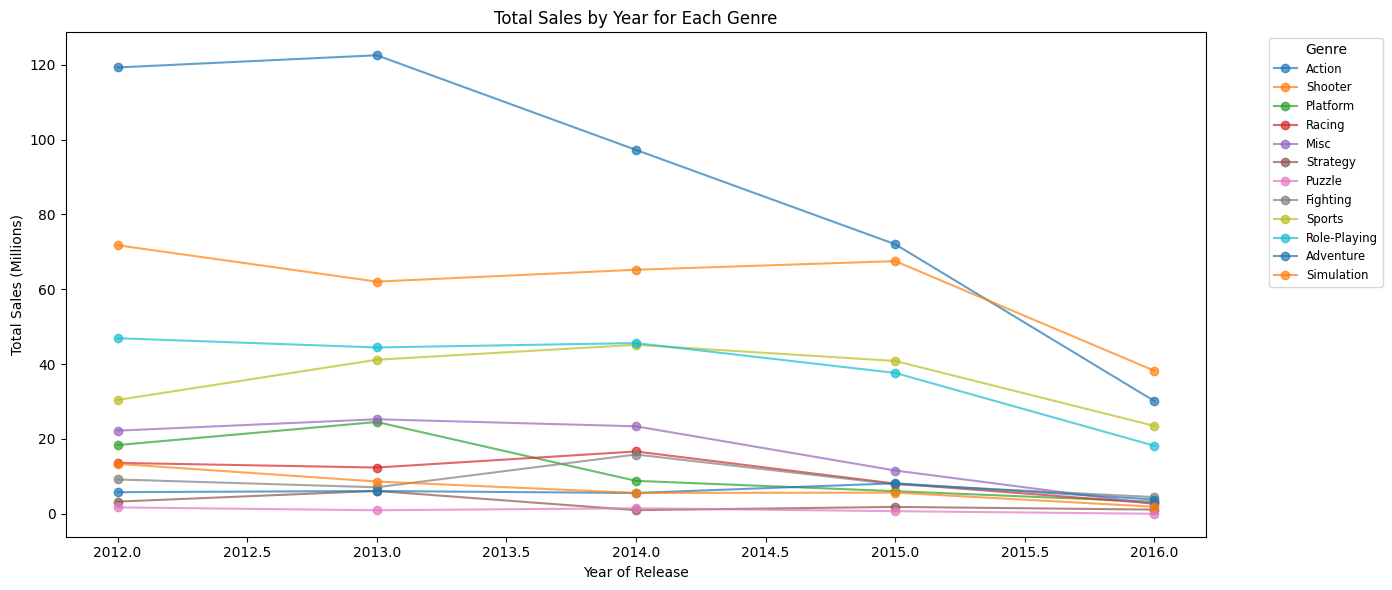

In [193]:
# Genre perfermance through each year
genre_total_sales_by_year = (
    relevant_games
    .groupby(['genre', 'year_of_release'])['total_sales']
    .sum()
    .reset_index()
    .sort_values(by='year_of_release')
)
# unique genre list
relevant_genre_list = genre_total_sales_by_year['genre'].unique()
plt.figure(figsize=(14, 6))

# loop to show all genres
for genre in relevant_genre_list:
    subset_2 = genre_total_sales_by_year[genre_total_sales_by_year['genre'] == genre]
    plt.plot(
        subset_2['year_of_release'],
        subset_2['total_sales'],
        marker='o',
        label=genre,
        alpha=0.7
    )

plt.title('Total Sales by Year for Each Genre')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (Millions)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

### Key Questions for Genre Analysis:
- Which genres consistently perform well?
- Are there any genres showing recent growth or decline?
- How does the average performance vary across genres?

### Genre analysis
According to the plots above nearly every game is trending towards declining total sales per year. Action and shooter genres perform the best in term of total sales and have roughly 30.5% and 21.1% percent of market share respectively. Solely looking at market share satatistic one could conclude that action is the most profitble genre; however, upon calculating average total sale per game within each genre we see action is not the most profitable one.
List of average sale by game per genre (in millions):
- Shooter (1.30)
- platform (0.71)
- Sports (0.68)
- Role-playing (0.52)
- Racing (0.46)
- Misc (0.44)
- Simulation (0.44)
- Action (0.43)
- Fighting (0.41)
- Strategy (0.19)
- Puzzle (0.17)
- Adventure (.10)

Action has dominated in total sales due the production of more games in the genre. 

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

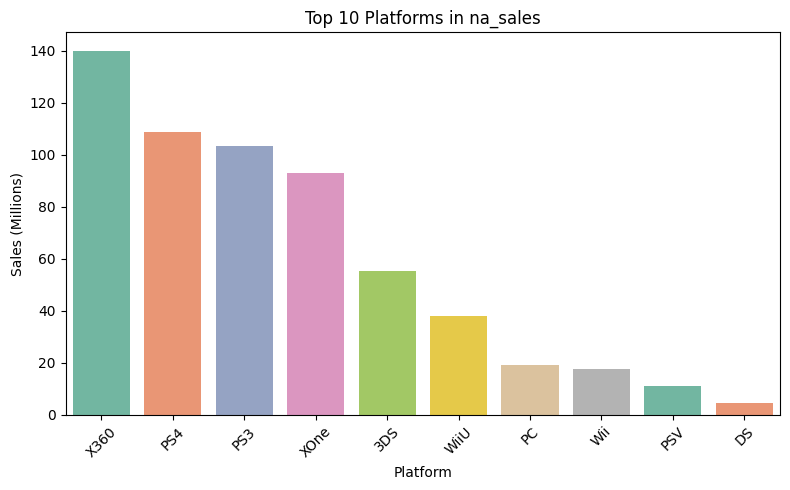

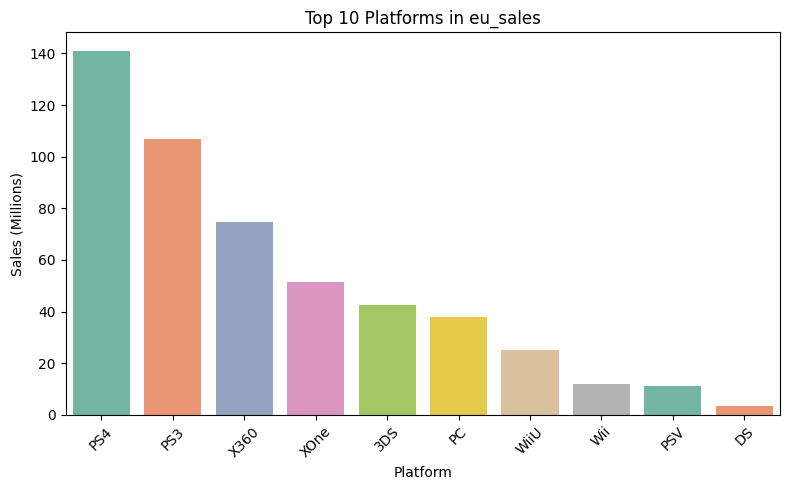

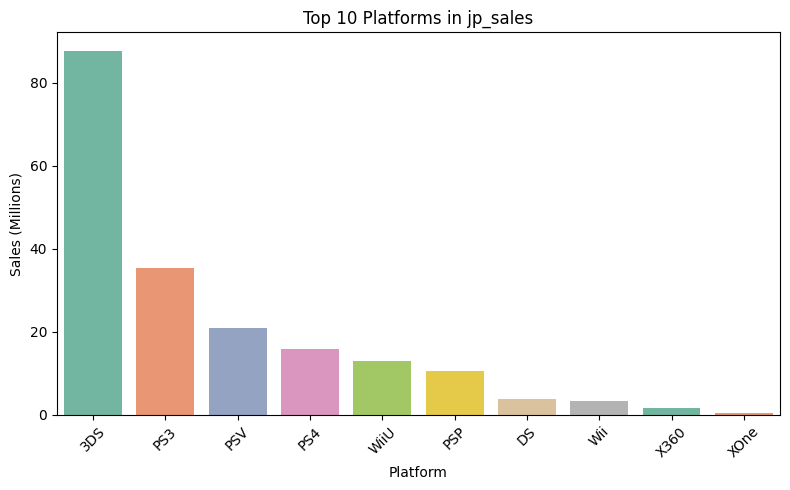

In [194]:
# Function to analyze platform performance by region
def plot_region_platform_sales(data, region):

    # Group and sort
    region_data = (
        data.groupby('platform')[region]
        .sum()
        .sort_values(ascending=False)
        .head(10)
    )

    # Plot
    plt.figure(figsize=(8, 5))
    sns.barplot(x=region_data.index, y=region_data.values, palette='Set2')
    plt.title(f'Top 10 Platforms in {region}')
    plt.ylabel('Sales (Millions)')
    plt.xlabel('Platform')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_region_platform_sales(relevant_games, 'na_sales')
plot_region_platform_sales(relevant_games, 'eu_sales')
plot_region_platform_sales(relevant_games, 'jp_sales')

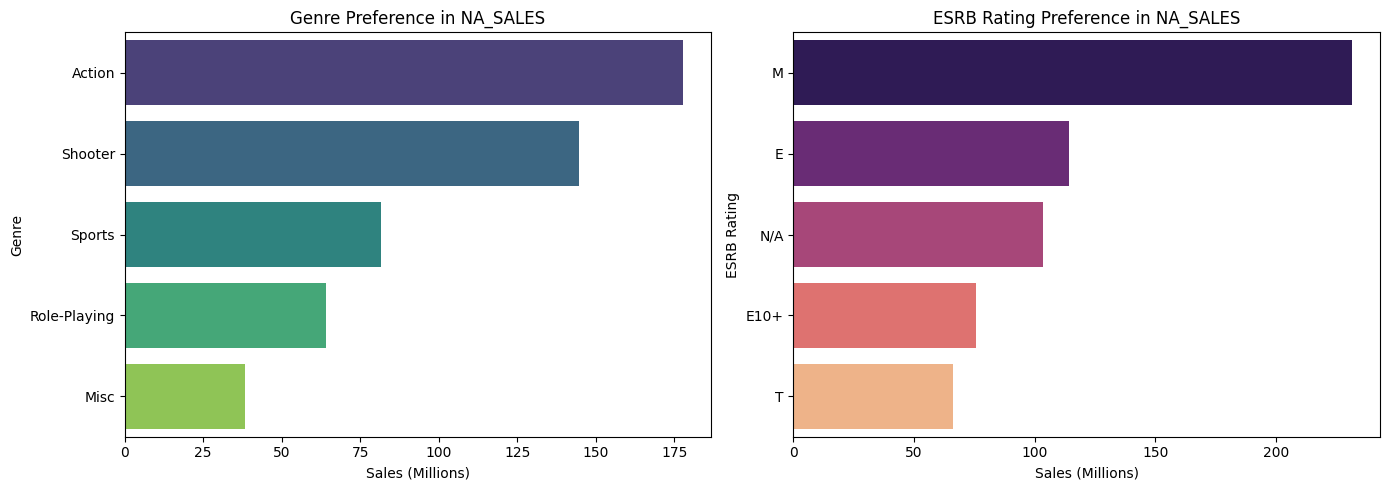

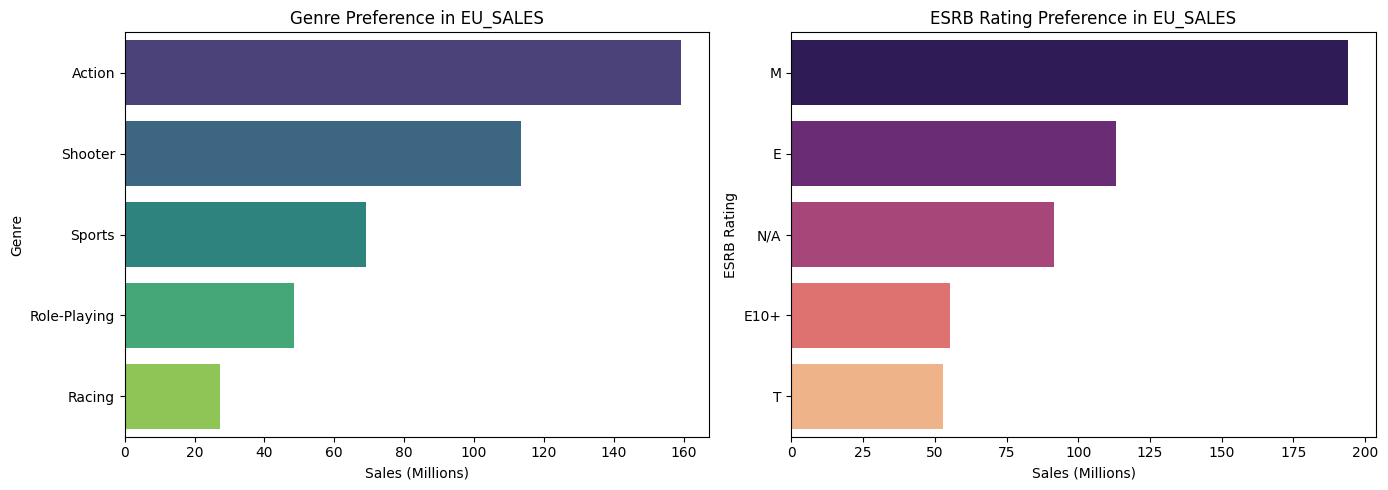

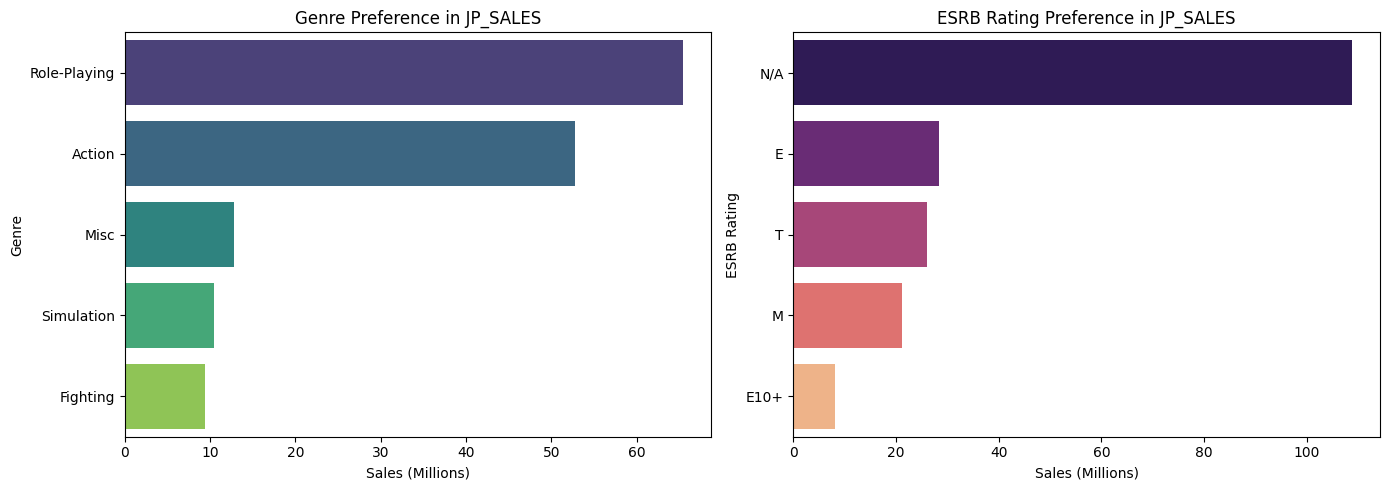

In [195]:
# Analyze each region
def analyze_and_plot_region_preferences(data, region):

    # Group by genre
    genre_sales = (
        data.groupby('genre')[region]
        .sum()
        .sort_values(ascending=False)
        .head(5)
    )

    # Group by ESRB rating
    rating_sales = (
        data.groupby('rating')[region]
        .sum()
        .sort_values(ascending=False)
        .head(5)
    )

    # Plotting
    plt.figure(figsize=(14, 5))

    # Genre plot
    plt.subplot(1, 2, 1)
    sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='viridis')
    plt.title(f'Genre Preference in {region.upper()}')
    plt.xlabel('Sales (Millions)')
    plt.ylabel('Genre')

    # Rating plot
    plt.subplot(1, 2, 2)
    sns.barplot(x=rating_sales.values, y=rating_sales.index, palette='magma')
    plt.title(f'ESRB Rating Preference in {region.upper()}')
    plt.xlabel('Sales (Millions)')
    plt.ylabel('ESRB Rating')

    plt.tight_layout()
    plt.show()
analyze_and_plot_region_preferences(relevant_games, 'na_sales')
analyze_and_plot_region_preferences(relevant_games, 'eu_sales')
analyze_and_plot_region_preferences(relevant_games, 'jp_sales')


### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:


In [196]:
# Create a comparative platform analysis
# Group by platform and sum regional sales
platform_region_sales = (
    relevant_games.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']]
    .sum()
    .sort_values(by=['na_sales', 'eu_sales', 'jp_sales'], ascending=False)
)

# filter to top 5 platforms
top_platforms = platform_region_sales.head(10)

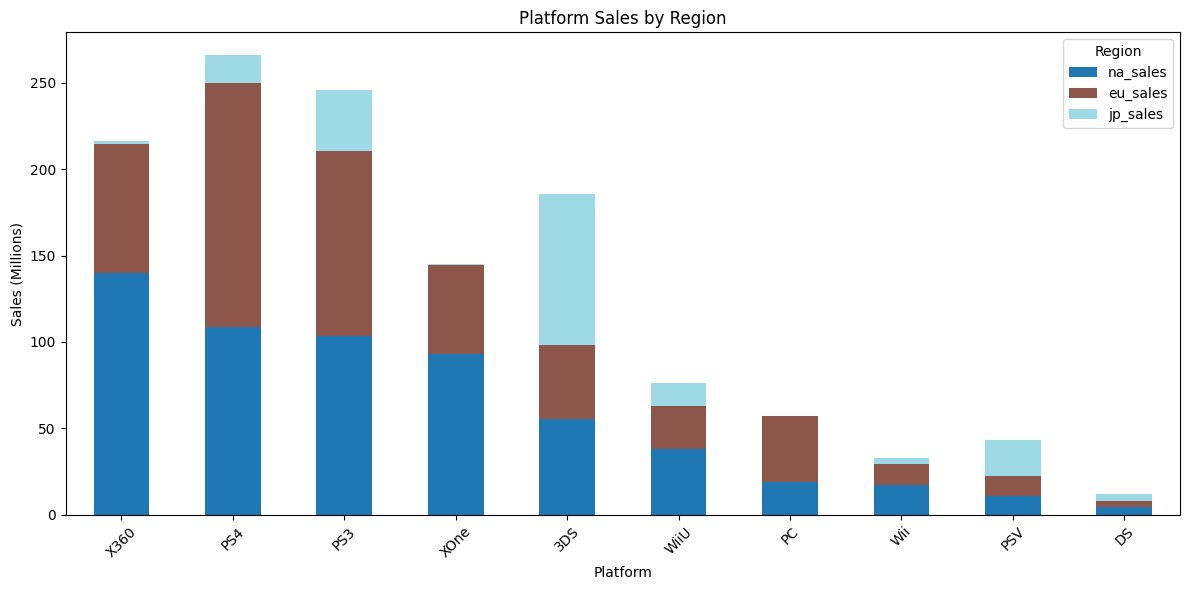

In [197]:
# Visualize cross-regional comparison for top platforms
top_platforms.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

plt.title('Platform Sales by Region')
plt.xlabel('Platform')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

In [198]:
# Function to analyze genre performance by region
# Group by genre and sum sales in each region
genre_region_sales = (
    relevant_games.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']]
    .sum()
    .sort_values(by=['na_sales', 'eu_sales', 'jp_sales'], ascending=False)
)
# top 5 genres
top_genres = genre_region_sales.head(5)

### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

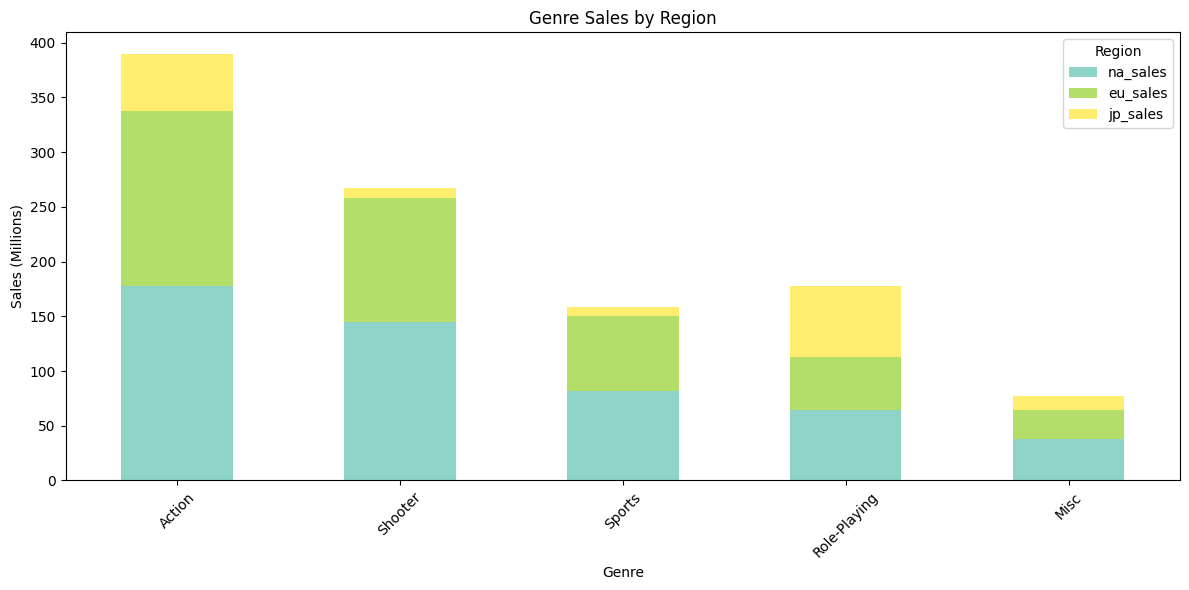

In [199]:
# Create a comparative genre analysis
# Plot with stacked bars
top_genres.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')

plt.title('Genre Sales by Region')
plt.xlabel('Genre')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [200]:
# Function to analyze ESRB rating impact
# Group by ESRB rating and sum sales by region
rating_region_sales = (
    relevant_games.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']]
    .sum()
    .sort_values(by=['na_sales', 'eu_sales', 'jp_sales'], ascending=False)
)


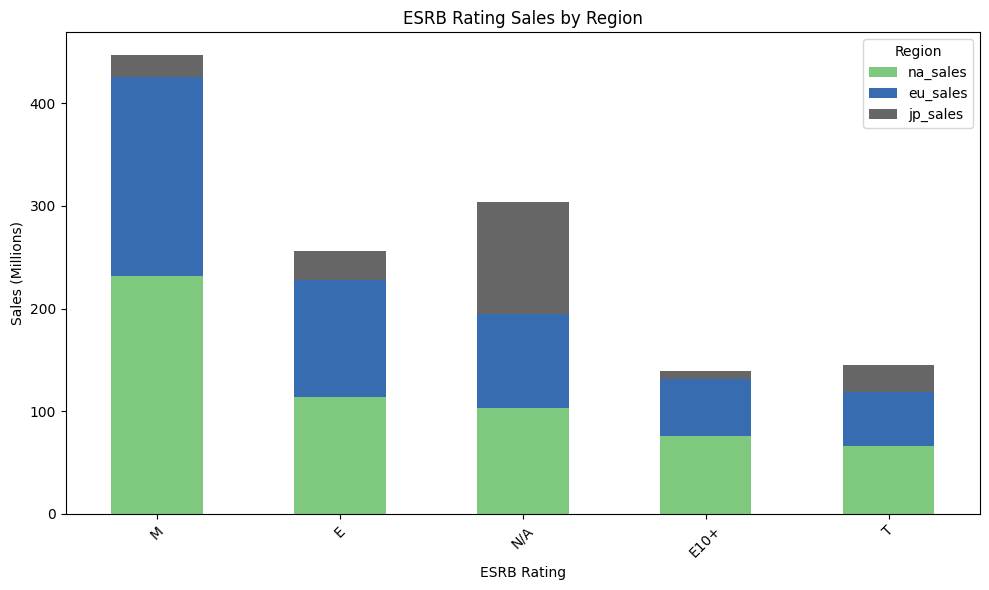

In [201]:
# Analyze ESRB impact for each region
# Plot with stacked bars 
rating_region_sales.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Accent')

plt.title('ESRB Rating Sales by Region')
plt.xlabel('ESRB Rating')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

# Step 5 : Hypothesis Tests


Average user ratings of the Xbox One and PC platforms are the same.
- Ho: Average user ratings of the Xbox One and PC platforms are the same.
- H1: Average user ratings of the Xbox One and PC platforms are NOT the same.

Average user ratings for the Action and Sports genres are different.
- Ho: Average user ratings for the Action and Sports genres are the same.
- H1:Average user ratings for the Action and Sports genres are different.


Set the *alpha* threshold value yourself.
alpha = 0.05
Explain:

—How you formulated the null and alternative hypotheses

—What criteria you used to test the hypotheses~~,~~ and why



In [202]:
# setting significance level
# Xone and PC platforms
alpha = 0.05
user_score_xone = relevant_games[(relevant_games['platform'] == 'XOne') & (relevant_games['user_score'].notnull())]['user_score']
user_score_pc = relevant_games[(relevant_games['platform'] == 'PC') & (relevant_games['user_score'].notnull())]['user_score']

results = st.ttest_ind(user_score_xone, user_score_pc, equal_var=False)  # Welch's t-test

print(f"P-value: {results.pvalue}")

if results.pvalue < alpha:
    print("We reject the null hypothesis: there is a significant difference in average user score.")
else:
    print("We can't reject the null hypothesis: there is not a significant difference in average user score.")


P-value: 0.5489537965134912
We can't reject the null hypothesis: there is not a significant difference in average user score.


In [203]:
# Actions and Sports Genres
action_user_ratings = relevant_games[(relevant_games['genre'] == 'Action') & (relevant_games['user_score'].notnull())]['user_score']
sports_user_ratings = relevant_games[(relevant_games['genre'] == 'Sports') & (relevant_games['user_score'].notnull())]['user_score']

results = st.ttest_ind(action_user_ratings, sports_user_ratings, equal_var=False)  # Welch's t-test

print(f"P-value: {results.pvalue}")

if results.pvalue < alpha:
    print("We reject the null hypothesis: there is a significant difference in average user score.")
else:
    print("We can't reject the null hypothesis: there is not a significant difference in average user score.")

P-value: 4.24307776572644e-20
We reject the null hypothesis: there is a significant difference in average user score.


### Hypothesis Test Conclusion
Null hypothesis is that average user ratings for XOne and PC as well as average user ratings Action and Sports are equal. 
Alternative hypothesis is that the averages are different.

I used the standard alpha value of 0.05 and ran a welch's t-test

In XOne vs Pc we cannot reject the null hypotehsis meaning there is no significant difference in average user score between platforms

In Actions vs Sports we reject the null hypothesis meaning there is a significant difference in average user score between the genres. 

# Step 6. Write a general conclusion


The goal of Video Game Sales Forecasting Project was to clean and prepare data for analysis to make a prognosis for the 2017 year. Since we were given data since 1980 we had to determine what period is actually useful for the 2017 prediction. It was decided that 2012-2016 was the most significant period for our analysis.

For this period we looked at total sales for different platforms, genres, esrb ratings and regions. 

Top performing platforms:
- ps4
- ps3

These two platforms generated the most sales globally. Playstation platform has dominated recently could be due to better pricing or exclusive titles.

Top performing genres:
- Action
- Shooter

These two genres are generating the most sales globally. These perhaps have more online multiplayer capabilities and for that reason are more engaging. 

Top performing esrb ratings:
- M
- E

The top two performing ESRB ratings in term of total global sales are complete opposite for intended audience. Though rated E games are meant to be for everyone, rated M games out performs them evenwhile having a smaller intended audience

Regional data does vary slighlty meaning slightly different prognosis will be given for each region.
